In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7.5,5)})
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

#### Preamble

In [2]:
df = pd.read_csv(os.path.join('files', 'for-plots.csv'))
df = df[df['icpsr'].notnull()]

df['minutes'] = [str(x).replace(',','') for x in df['minutes']]
df['minutes'] = df['minutes'].astype('float')

In [3]:
# Graph settings
TRANSPARENCY = 0.45
LINECOLOR = 'dimgray'
REPCOLOR = 'tab:red'
DEMCOLOR = 'midnightblue'

PALETTE2 = ['darkorange', 'darkgreen'] # For senate vs others

### Recipient CF-score

In [4]:
score = 'recipient.cfscore'

# Median scores
DEM_MEDIAN = df[df['party']=='D'][score].median()
REP_MEDIAN = df[df['party']=='R'][score].median()

DEM_SENATE_MEDIAN = df[(df['party']=='D')&(df['seat']=='federal:senate')][score].median()
REP_SENATE_MEDIAN = df[(df['party']=='R')&(df['seat']=='federal:senate')][score].median()

agg = df.groupby(score)['minutes'].sum().reset_index()

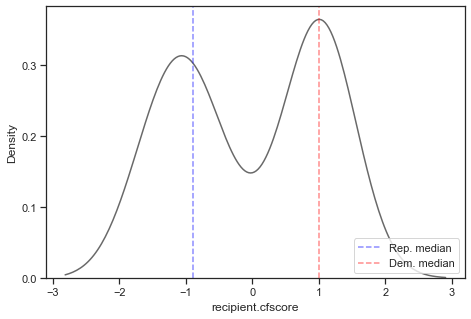

In [5]:
g = sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR, legend=True)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Rep. median', 'Dem. median'], loc='lower right')

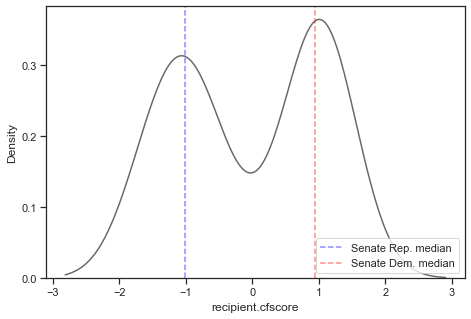

In [6]:
g = sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR, legend=True)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Senate Rep. median', 'Senate Dem. median'], loc='lower right')

### Contributor CF-score

In [7]:
score = 'contributor.cfscore'

# Median scores
DEM_MEDIAN = df[df['party']=='D'][score].median()
REP_MEDIAN = df[df['party']=='R'][score].median()

DEM_SENATE_MEDIAN = df[(df['party']=='D')&(df['seat']=='federal:senate')][score].median()
REP_SENATE_MEDIAN = df[(df['party']=='R')&(df['seat']=='federal:senate')][score].median()

agg = df.groupby(score)['minutes'].sum().reset_index()

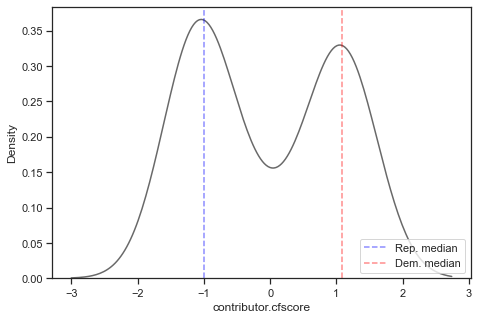

In [8]:
sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Rep. median', 'Dem. median'], loc='lower right')

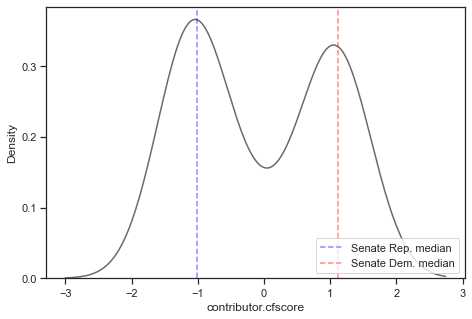

In [9]:
g = sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Senate Rep. median', 'Senate Dem. median'], loc='lower right')

### Senate vs. others

In [10]:
_count = len(df[df['seat']=='federal:senate'])
print(f"Sample has {_count} senators")

Sample has 108 senators


In [11]:
score = 'recipient.cfscore'

# Median scores
DEM_MEDIAN = df[df['party']=='D'][score].median()
REP_MEDIAN = df[df['party']=='R'][score].median()

DEM_SENATE_MEDIAN = df[(df['party']=='D')&(df['seat']=='federal:senate')][score].median()
REP_SENATE_MEDIAN = df[(df['party']=='R')&(df['seat']=='federal:senate')][score].median()

_df = df[df[score].notnull()]
_df['Senate'] = np.where(_df['seat']=='federal:senate', 'Yes', 'No')
agg = _df.groupby([score, 'Senate'])['minutes'].sum().reset_index()

#### Recipient cfscore

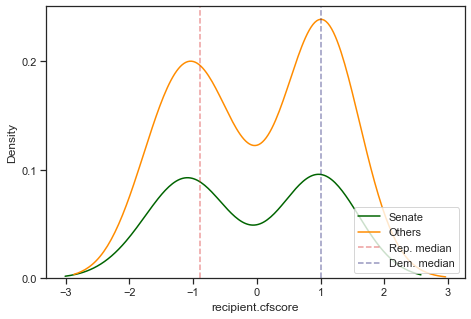

In [12]:
g = sns.kdeplot(data=agg, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=5)

plt.legend(['Senate', 'Others', 'Rep. median', 'Dem. median'], loc='lower right')

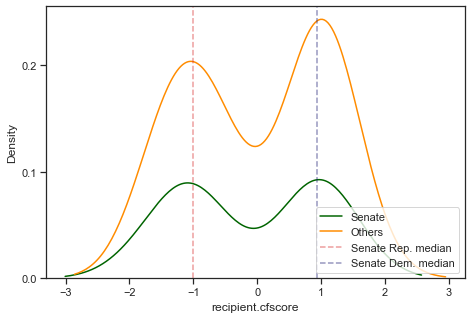

In [13]:
g = sns.kdeplot(data=_df, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=5)

plt.legend(['Senate', 'Others', 'Senate Rep. median', 'Senate Dem. median'], loc='lower right')

#### Contributor cfscore

In [14]:
score = 'contributor.cfscore'

# Median scores
DEM_MEDIAN = df[df['party']=='D'][score].median()
REP_MEDIAN = df[df['party']=='R'][score].median()

DEM_SENATE_MEDIAN = df[(df['party']=='D')&(df['seat']=='federal:senate')][score].median()
REP_SENATE_MEDIAN = df[(df['party']=='R')&(df['seat']=='federal:senate')][score].median()

_df = df[df[score].notnull()]
_df['Senate'] = np.where(_df['seat']=='federal:senate', 'Yes', 'No')
agg = _df.groupby([score, 'Senate'])['minutes'].sum().reset_index()

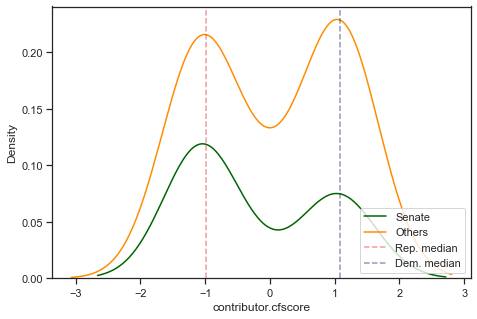

In [15]:
g = sns.kdeplot(data=_df, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)

plt.legend(['Senate', 'Others', 'Rep. median', 'Dem. median'], loc='lower right')

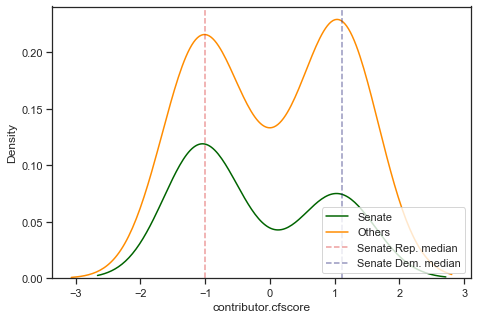

In [16]:
g = sns.kdeplot(data=_df, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)

plt.legend(['Senate', 'Others', 'Senate Rep. median', 'Senate Dem. median'], loc='lower right')